In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from collections import Counter
import pickle

In [2]:
full_vec = np.load('full_vec.npy')
full_vec.shape

(9222, 420)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
trainX, testX, trainY, testY = train_test_split(full_vec[:,:-4], full_vec[:,-4:], test_size=0.2, random_state=42)
print('{:17}{:d}x{:d}'.format('Training set is.',*trainX.shape))
print('{:17}{:d}x{:d}'.format('Testing set is..',*testX.shape))

Training set is. 7377x416
Testing set is.. 1845x416


In [6]:
from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [7]:
trainY_argmax=np.argmax(trainY, axis=1)

clf = SVC(C=2.5, gamma='auto', probability=True)
pipeline = Pipeline([('scaling', StandardScaler()), ('svc', clf)])
fit=pipeline.fit(trainX, trainY_argmax)

In [8]:
pred_test=pipeline.predict_proba(testX)

In [11]:
np.sum(np.argmax(pred_test, axis=1) == np.argmax(testY, axis=1))/pred_test.shape[0] # should be at 0.702

0.70243902439024386

### Now onto the blind set

In [13]:
blindX=np.load('blind_vec.npy')

In [15]:
pred_test=pipeline.predict_proba(blindX)
np.argmax(pred_test, axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Regenerate features again including blind set

In [21]:
full_vec2=np.load('full_vec2.npy')

In [34]:
trainX, testX, trainY, testY = train_test_split(full_vec2[:-20,:-4], full_vec2[:-20,-4:], test_size=0.2, random_state=False)
print('{:17}{:d}x{:d}'.format('Training set is.',*trainX.shape))
print('{:17}{:d}x{:d}'.format('Testing set is..',*testX.shape))
blind=full_vec[-20:,:-4]
print(blind.shape)

Training set is. 7377x416
Testing set is.. 1845x416
(20, 416)


In [112]:
blind=np.load('blind_vec.npy')[:,:-4]
blind.shape

(20, 416)

In [103]:
np.argmax(trainY, axis=1)[:100]

array([2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 3, 2, 3, 3, 0, 0, 0, 2, 3, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 3, 0, 1, 2, 0, 0, 1, 1, 2, 0, 3, 2, 0, 1, 2, 0, 1, 3,
       0, 2, 3, 3, 2, 1, 1, 0, 0, 3, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       3, 3, 0, 0, 0, 3, 1, 2, 1, 3, 2, 3, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 3,
       3, 3, 2, 0, 0, 0, 3, 2])

In [113]:
trainY_argmax=np.argmax(trainY, axis=1)

clf = SVC(C=2.5, gamma='auto', probability=True)
pipeline = Pipeline([('scaling', StandardScaler()), ('svc', clf)])
fit=pipeline.fit(trainX, trainY_argmax)

In [114]:
pred_test=pipeline.predict(np.concatenate((testX, blind), axis=0))

In [119]:
pred_test[:20]

array([0, 2, 2, 0, 1, 3, 1, 1, 2, 3, 2, 2, 2, 3, 2, 0, 1, 0, 3, 3])

In [106]:
np.sum(pred_test == np.argmax(testY, axis=1))/pred_test.shape[0]

0.71165311653116536

In [107]:
proba=pipeline.predict_proba(blind)
idx=np.argmax(proba, axis=1)

In [108]:
idx

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [99]:
c=0
for i in proba:
    print('%s Secreted Confidence %.4f'%(seqs[c], i[-1]))
    c+=1

SEQ677 Secreted Confidence 0.8208
SEQ231 Secreted Confidence 0.8265
SEQ871 Secreted Confidence 0.8244
SEQ388 Secreted Confidence 0.8273
SEQ122 Secreted Confidence 0.8272
SEQ758 Secreted Confidence 0.8024
SEQ333 Secreted Confidence 0.8238
SEQ937 Secreted Confidence 0.8207
SEQ351 Secreted Confidence 0.8241
SEQ202 Secreted Confidence 0.8271
SEQ608 Secreted Confidence 0.8236
SEQ402 Secreted Confidence 0.7859
SEQ433 Secreted Confidence 0.8285
SEQ821 Secreted Confidence 0.8249
SEQ322 Secreted Confidence 0.8186
SEQ982 Secreted Confidence 0.8192
SEQ951 Secreted Confidence 0.8219
SEQ173 Secreted Confidence 0.7865
SEQ862 Secreted Confidence 0.8258
SEQ224 Secreted Confidence 0.8276


In [88]:
seqs=['SEQ677',
 'SEQ231',
 'SEQ871',
 'SEQ388',
 'SEQ122',
 'SEQ758',
 'SEQ333',
 'SEQ937',
 'SEQ351',
 'SEQ202',
 'SEQ608',
 'SEQ402',
 'SEQ433',
 'SEQ821',
 'SEQ322',
 'SEQ982',
 'SEQ951',
 'SEQ173',
 'SEQ862',
 'SEQ224']

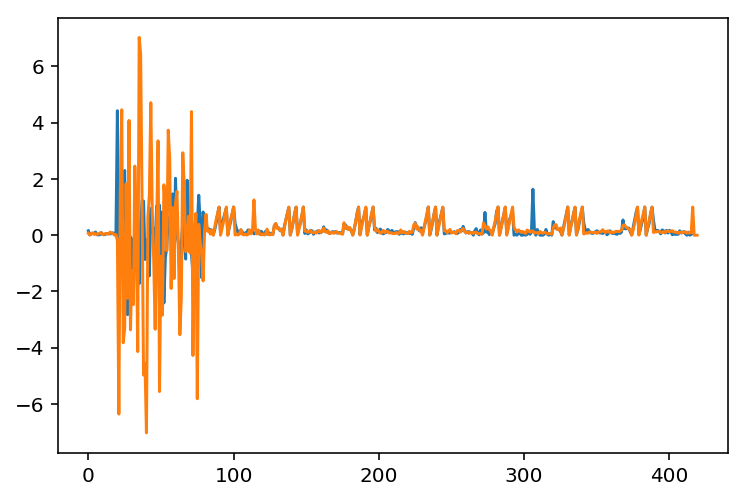

In [135]:
plt.plot(blind[10,:])
plt.plot(full_vec[13,:], alpha=1)